# Import different libraries

In this task we want to use [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) library for DBSCAN implementation.

In [2]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Example usage of DBSCAN:

In [3]:
# Define the data you want to cluster
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])

# Define your desired clustering
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

# Retrive the clustering result (Noisy samples are given the label -1)
clustering.labels_

array([ 0,  0,  0,  1,  1, -1])

# Data

We need to define the data here

In [ ]:
# TODO: define the data as a 2d numpy array with the values provided in the assignment
X = np.array([[7, 2], [2, 9], [10, 5], [4, 11], [12, 3], [11, 8], [5, 10], [3, 7],
              [9, 4], [6, 2], [13, 12], [8, 6], [1, 14], [10, 1], [7, 11]])

assert X is not None, "You did not define the data yet!"
print("Array of points")
print(X)

Array of points
[[ 7  2]
 [ 2  9]
 [10  5]
 [ 4 11]
 [12  3]
 [11  8]
 [ 5 10]
 [ 3  7]
 [ 9  4]
 [ 6  2]
 [13 12]
 [ 8  6]
 [ 1 14]
 [10  1]
 [ 7 11]]


# Cluster

Call and run the the sklearn DBSCAN.

In [6]:
# TODO: define a clustering and fit it to the data
clustering = DBSCAN(eps=3, min_samples=4).fit(X)
assert clustering is not None, "You did not define the clustering yet!"

labels = clustering.labels_
labels

array([ 0,  1,  0,  1,  0, -1,  1, -1,  0, -1, -1,  0, -1, -1,  1])

In [7]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 6


# Plot

Use the following code to plot the clusters.

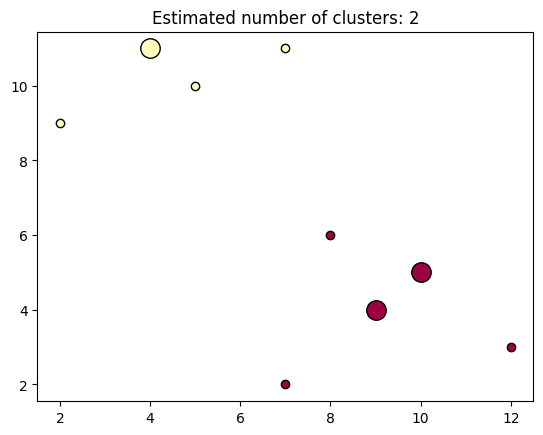

In [8]:
# TODO: Include this output in your report

# Identify unique labels and core samples
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

# Create the color map for clusters
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Skip noise points
        continue

    class_member_mask = labels == k

    # Plot core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    # Plot non-core samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
plt.savefig('cluster.png')
plt.show()